In [1]:
import numpy as np
import matplotlib.pyplot as plt

import structs as S # import custom library
from structs import Struct # import Struct object from the castom libraty

In [2]:
def plot_profile(profile, ls='-'):
    l = len(profile)
    colors = plt.cm.jet(np.linspace(0,1,l))[::-1]
     
    for i in range(l):
        struct = profile[i]
        x, y = struct.get_plot_coord()
        plt.plot(x, y, c=colors[i], ls=ls)

# profile 1

In [3]:
Profile1 = [Struct('LIN', 50, 40, 50, -37), 
            Struct('ARC', 50, -37, 82, -58, 22.89, True),
            Struct('LIN', 82, -58, 101, -46),
            Struct('LIN', 101, -46, 130, -46),
            Struct('LIN', 130, -46, 130, -25),
            Struct('ARC', 130, -25,148, -7, 18, False),
            Struct('LIN', 148, -7, 168, -7),
            Struct('ARC', 168, -7, 183, 8, 15, True),
            Struct('LIN', 183, 8, 183, 28),
            Struct('LIN', 183, 28, 153, 48),
            Struct('LIN', 153, 48, 58, 48),
            Struct('ARC', 58, 48, 50, 40, 8, True)]

In [4]:
print(Profile1[0])
print(Profile1[1])

line with coordinates (50, 40)->(50, -37)
arc with coordinates (50, -37)->(82, -58), located inside: True


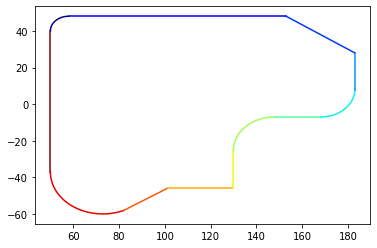

In [5]:
plot_profile(Profile1)

# Using just bisector, we have some local problems when two bisectors intersect

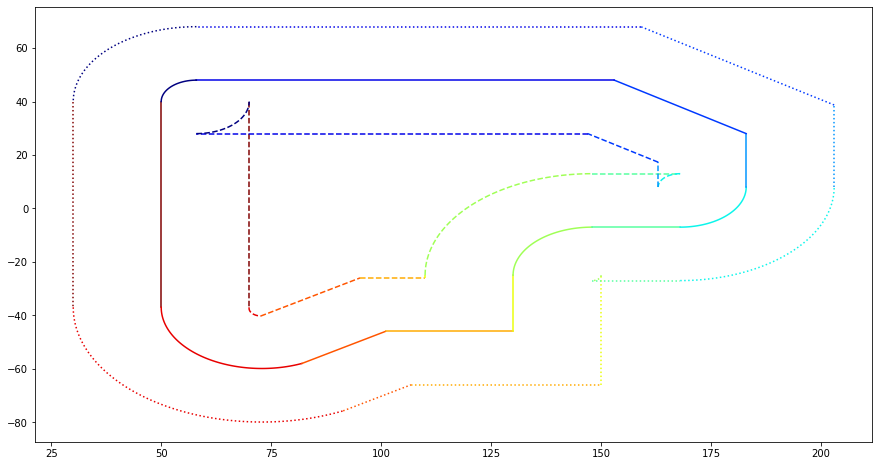

In [6]:
Profile1_off__20 = S.get_simple_offset(Profile1, offset=-20)
Profile1_off_20 = S.get_simple_offset(Profile1, offset=20)

plt.figure(figsize=(15,8)) 
plot_profile(Profile1)
plot_profile(Profile1_off__20, '--')
plot_profile(Profile1_off_20, 'dotted')

# Using the 'stuck circle' method proposed in the paper 'A robust 2D point-sequence curve offset algorithm with multiple islands for contour-parallel tool path' I have altered it for lines and arcs

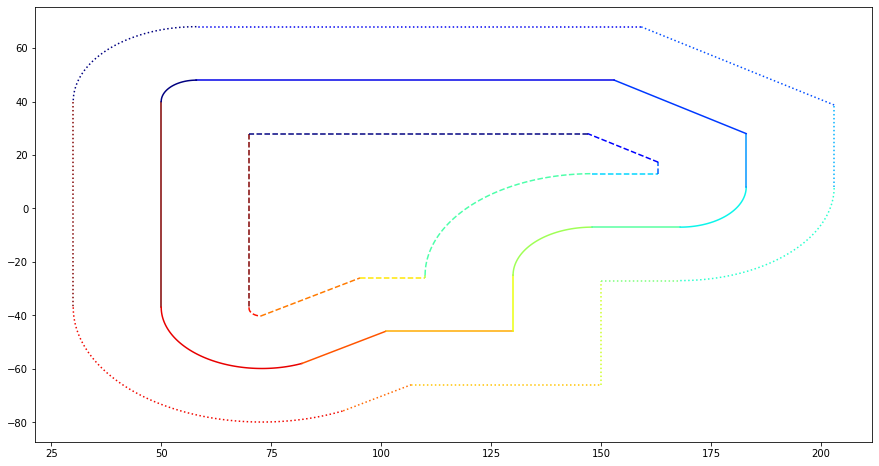

In [7]:
Profile1_off__20 = S.get_offset(Profile1, offset=-20)
Profile1_off_20 = S.get_offset(Profile1, offset=20)

plt.figure(figsize=(15,8)) 
plot_profile(Profile1)
plot_profile(Profile1_off__20, '--')
plot_profile(Profile1_off_20, 'dotted')

# All possible configurations of lines and arcs have to be examined furhter, now the implemetation can't deal with many problems. For example:

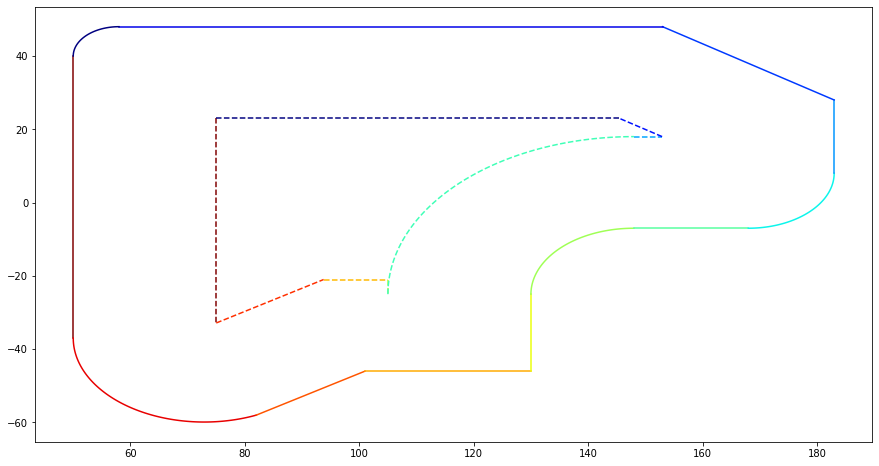

In [8]:
Profile1_off__30 = S.get_offset(Profile1, offset=-25)

plt.figure(figsize=(15,8)) 
plot_profile(Profile1)
plot_profile(Profile1_off__30, '--')

# profile 2

In [9]:
Profile2 = [Struct('LIN', 17, 122, 17, 65),
            Struct('ARC', 17, 65, 47, 35, 30, True),
            Struct('LIN', 47, 35, 68.803, 35),
            Struct('ARC', 68.803, 35, 97.748,57.117, 30, True),
            Struct('ARC', 97.748,57.117, 120.919, 83.925, 41, False),
            Struct('LIN', 120.919, 83.925, 177.725, 83.925),
            Struct('ARC', 177.725, 83.925, 220.181,61.774, 51.763, False),
            Struct('LIN', 220.181, 61.774, 229.789, 48),
            Struct('LIN', 229.789, 48, 245 ,48),
            Struct('ARC', 245,48, 255, 58, 10, True),
            Struct('LIN', 255, 58, 255, 90),
            Struct('LIN', 255, 90, 142, 90),
            Struct('LIN', 142, 90, 142, 98),
            Struct('ARC', 142, 98, 118, 122, 24, True),
            Struct('LIN', 118, 122, 17,122)]

In [10]:
Profile2_off__20 = S.get_offset(Profile2, offset=-10)

# problem of global self intersection - will be solved further as in the paper

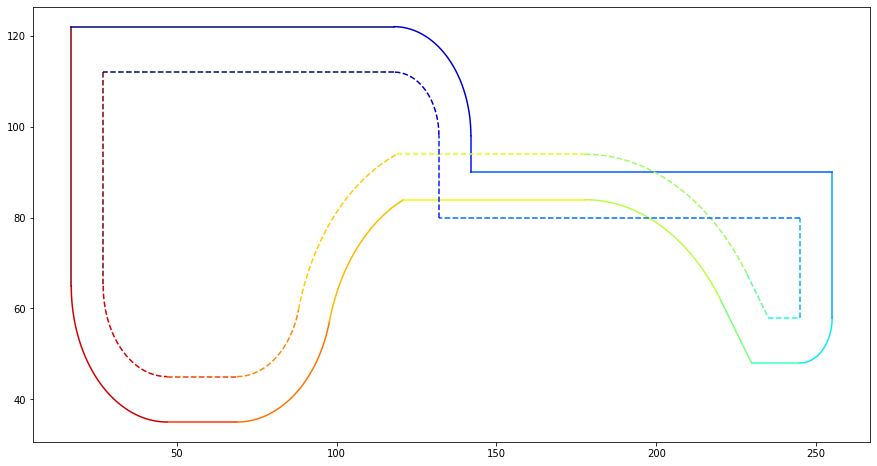

In [11]:
plt.figure(figsize=(15,8)) 
plot_profile(Profile2)
plot_profile(Profile2_off__20, '--')

# stuck circle configurations

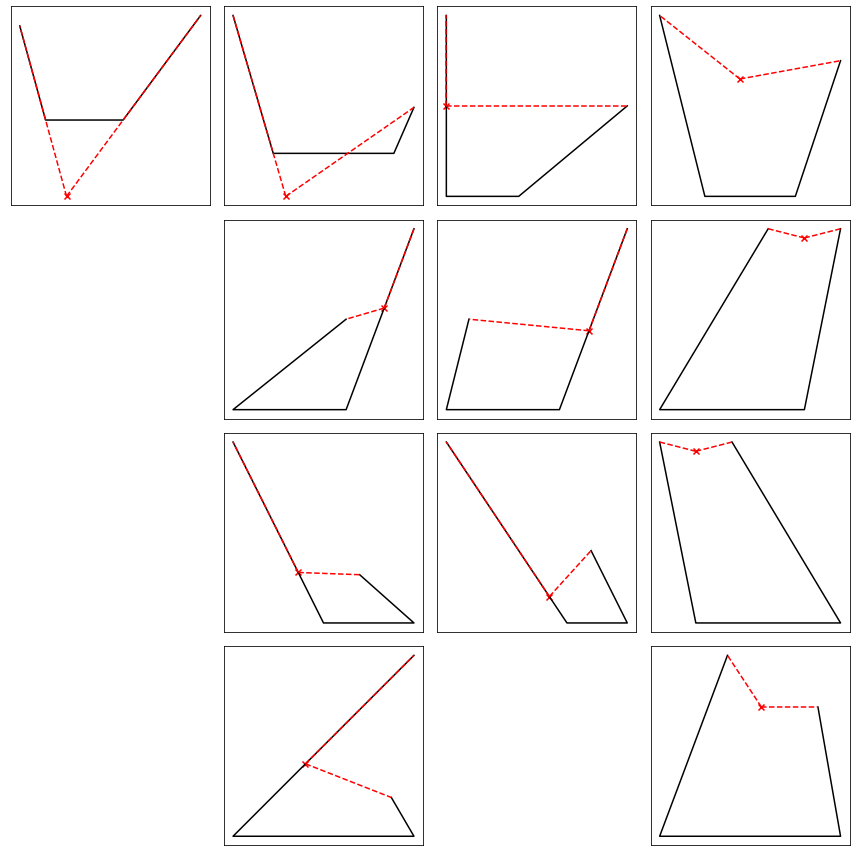

In [12]:
r = 5
test_sets = [
    [(-7,9),(-5,0),(1,0),(7,10),5], [(-7, 9),(-5,0),(1,0),(2,3), 5], [(0, 20),(0, 0),(2, 0),(5, 10),5], [(-3, 4),(-2,0),(0,0),(1,3),5],
    None, [(0,10),(-5,0),(0,0),(3, 20),5], [(-4,10),(-5,0),(0,0),(3, 20),5], [(-2,4),(-5,0),(-1,0),(0,4),5],
    None, [(-5,15),(0,0),(5, 0),(2,4),5], [(-10,10),(0,0),(5, 0),(2,4),5], [(0, 4),(1,0),(5,0),(2,4), 5],
    None, [(5, 14),(-3,0),(5,0),(4, 3), 5], None, [(0, 7),(-3,0),(5,0),(4, 5), 5]]
hard_cases = [(5, 14),(-3,0),(5,0),(0, 3), 5], [(2, 2),(-5,0),(3,0),(5, 14), 5]

plt.figure(figsize=(12, 12))
for i in range(16):
    coordinates = test_sets[i]
    if not coordinates:
        continue
    plt.subplot(4, 4, i+1)
    P1, P2, P3, P4, r = coordinates
    P1, P2, P3, P4 = [np.array(i) for i in [P1, P2, P3, P4]]

    
    plt.plot([P1[0], P2[0], P3[0], P4[0]], [P1[1], P2[1], P3[1], P4[1]], c='k')   
    A = S.get_stuck_circle_cut_point(P1, P2, P3, P4, r)
    plt.scatter(A[0], A[1], marker='x', color='r')
    x, y = S.get_line_plot(A, P1)
    plt.plot(x, y, c='r', ls='--')
    x, y = S.get_line_plot(A, P4)
    plt.plot(x, y, c='r', ls='--')
    
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()